# Generative Adversial Networks (GANs)

Applications of GANs include:
- Image generation
- Image to image translation
- "Deep fakes"

In simple words: **A GAN is a deep learning model tasked with replicating a real distribution of data.**

With GANs we use computer-generated data with the goal of mimicking real data as closely as possible so that telling the difference between "real" and "fake" data becomes especially difficult.

GANs are being used to create digital art, gaming imagery, and pharmaceutical simulations.

## Applications of GANs

GANs can be used for a number of broad applications.

Visual, Image-Based Applications –
- Creating new images
- Digital Art
- Image to Image Translation
- Realistic image training sets
- Imitation Learning

Less Visual Applications –
- Predicting the outcome of highly complex physics experiments
- Generating adversarial examples

## How GANs work

GANs is an unsupervised learning technique. 

### Image Generation

- Fully Visible Belief Networks – where the model generates an image one pixel at a time. This is also called an Autoregressive Model.
- Generative Adversarial Networks (GANs) – where the model generates an entire image in parallel using a differentiable function

### Architecture of GANs
GANs use a combination of neural networks to accomplish the task of image generation:
- **Generator Network** - takes random input through a differentiable function to transform and reshape it to have a recognizable structure. The output is a realistic image.
  - Unlike training a supervised learning model, when training a generator model, there is no classification/label to associate with each image. It creates additional images based on a probability distribution.
- **Discriminator Network** - is a regular neural net classifier that learns to guide the generator network by outputting the probability that the input is real. Fake images are 0 and real images are 1.
  - The generator network is forced to produce more realistic images to "fool" the discriminator network.

Training a GAN is like watching a competition between two networks, the discriminator and the generator. The generator tries to fool the discriminator by creating realistic images and the discriminator tries to identify which money is fake and which one is real. The word **adversarial** is referring to this competition.

Image:
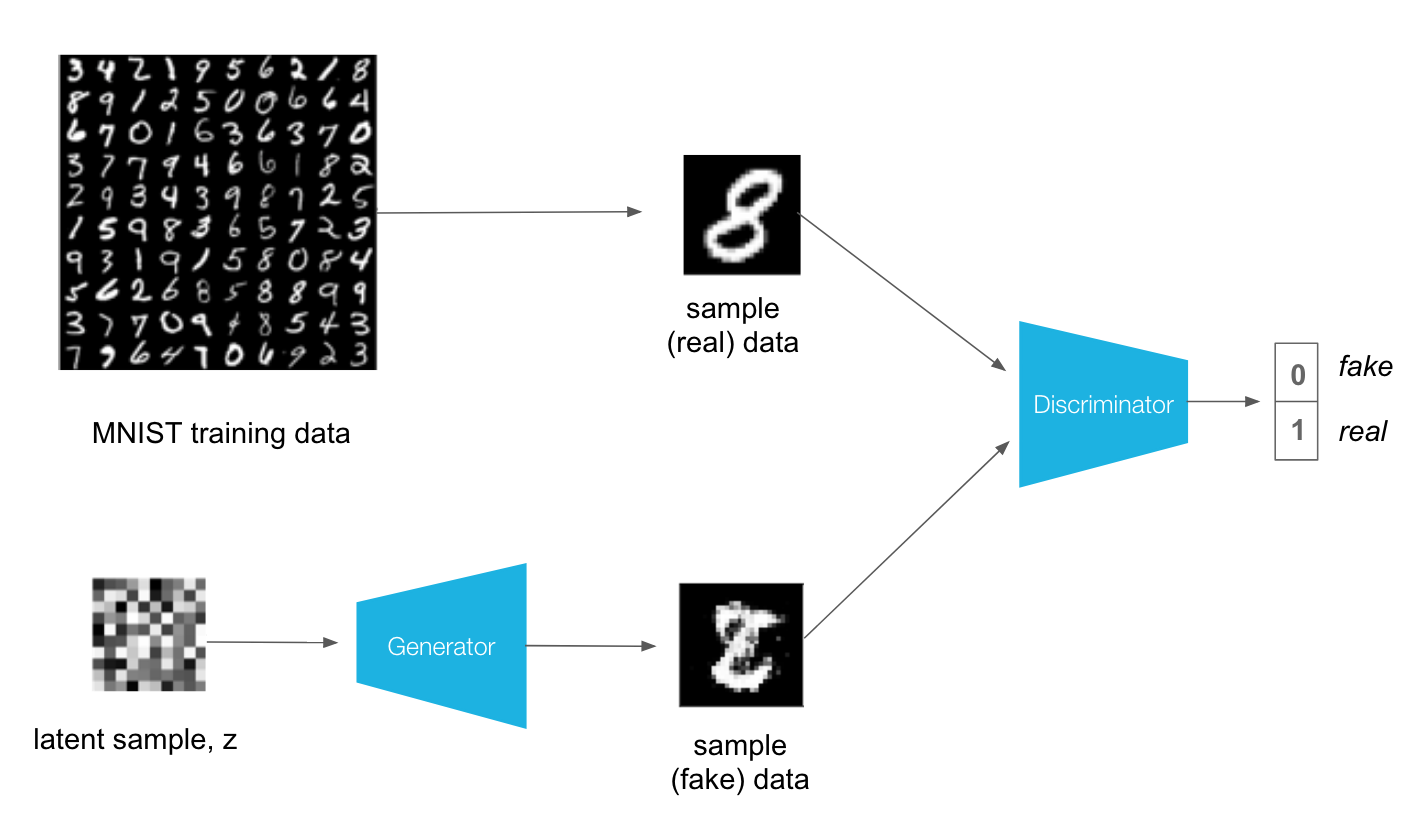

## Example code of Generator and Discriminator

**Generator**:
```python
class Generator(nn.Module):
    def __init__(self, latent_dim: int, hidden_dim: int, output_size: int):
        super(Generator, self).__init__()
        # define hidden linear layers
        self.fc1 = nn.Linear(latent_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim*2)
        self.fc3 = nn.Linear(hidden_dim*2, hidden_dim*4)
        
        # final fully-connected layer
        self.fc4 = nn.Linear(hidden_dim*4, output_size)
        
        # define the activation
        self.activation = nn.LeakyReLU(0.2)
        self.final_activation = nn.Tanh()

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.fc1(x)
        x = self.activation(x)

        x = self.fc2(x)
        x = self.activation(x)

        x = self.fc3(x)
        x = self.activation(x)
        
        x = self.fc4(x)
        x = self.final_activation(x)
        return x

latent_dim = 128
hidden_dim = 256
output_dim = 784

generator = Generator(latent_dim, hidden_dim, output_dim)
```

**Discriminator**
```python
class Discriminator(nn.Module):
    """
    Discriminator model:
    args: 
    - input_dim: dimension of the input data. For example, for a 28 by 28 grayscale image, the input size is 784
    - hidden_dim: a parameter that controls the dimensions of the hidden layers. 
    """
    def __init__(self, input_dim: int, hidden_dim: int):
        super(Discriminator, self).__init__()
        # define hidden linear layers
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.fc3 = nn.Linear(hidden_dim // 2, hidden_dim // 4)
        
        # define the final layer
        self.fc4 = nn.Linear(hidden_dim // 4, 1)        
        
        # define the dropout
        self.dropout = nn.Dropout(0.3)
        
        # define the activation
        self.activation = nn.LeakyReLU(0.2)
        
        # flatten layer
        self.flatten = nn.Flatten()
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # flatten image
        x = self.flatten(x)
        
        x = self.fc1(x)
        x = self.activation(x)
        x = self.dropout(x)

        x = self.fc2(x)
        x = self.activation(x)
        x = self.dropout(x)

        x = self.fc3(x)
        x = self.activation(x)
        x = self.dropout(x)
        
        # we are using BCE with logits loss so the last activation is not required
        x = self.fc4(x)
        return x

# for a 28x28 grayscale image flattened, the input dim is 784
input_dim = 784
hidden_dim = 256

discriminator = Discriminator(input_dim, hidden_dim)
```

## Equilibria and GANs

Equillibrium = evenwicht

Most ML models are based on optimization and follow the general pattern of
1. Determine model parameters
2. Have a cost function of these parameters
3. Minimize the cost

GANs are different because there are two players, the generator and the discriminator, and each player has its own cost. The "game" is therefore defined by a value function.
- The **generator wants to minimize** the value function.
- The **discriminator wants to maximize** the value function.
- The **saddle point** is when equilibrium is reached, a point in the parameters of both players that is simultaneously a local minimum for each player's costs with respect to that player's parameters.

A key learning problem for GANs is finding the equilibrium of a game involving cost functions that are:
- High dimensional
- Continuous
- Non-convex

Think about the Prisoner Dilemma for the Game Theory dilemma: https://www.youtube.com/watch?v=t9Lo2fgxWHw

## Tips for training GANs

### Good Architecture
Fully Connected Architecture can be used for simple tasks that meet the following criteria:
- No convolution
- No recurrence
- The generator and discriminator have a least one hidden layer

Leaky ReLU helps to make sure that the gradient can flow through the entire architecture and is a popular choice for hidden layer activation functions.

The Hyperbolic Tangent activation function is a popular output choice for the generator and means data should be scaled to the interval from -1 to +1.

A Sigmoid Unit is used to enforce the constraint that the output of the discriminator is a probability.

### Design Choice
One of the design choices from the DCGAN architecture is Adam, an optimization algorithm.

A common error is that people forget to use a numerically stable version of cross-entropy, where the loss is computed using the logits.
- **Logits – the values produced by the discriminator right before the sigmoid.**

### Tips for Training
1. A simple trick is to multiply the 0 or 1 labels by a number a bit less than 1. This is a GANs-specific label smoothing strategy similar to that used to regularize normal classifiers.
2. For the generator loss, minimize cross-entropy with the labels flipped.

### Scaling GANs
>Convolutie (samenvouwing) is een wiskundige bewerking, aangeduid door ∗ {\displaystyle \,*\,} (asterisk) of ⊗ {\displaystyle \,\otimes \,}, op twee functies met als resultaat een nieuwe functie: de convolutie van beide.

Convolutional Neural Networks (CNN) are needed to scale GANs to work on larger images. Scaling GANs relies on an understanding of:
- Classifier Convolutional Net – starting with a tall and wide feature map and moving to very short and narrow feature maps
- Generator Net – starting with short and narrow feature maps and moving to a wide and tall image
- Batch Normalization – on potentially every layer except the output layer of the generator and the input layer of the discriminator

## Steps for building a GAN
The steps for building a GAN to generate new images can be summarized as follows:
- Create a classifier by training on dataset images
- Create an adversarial training using a discriminator and generator
  - The discriminator acts as a simple classifier distinguishing between real and fake images
  - The generator acts as an adversary with the goal of tricking the discriminator into tagging generated images as "real"
- Define generator and discriminator networks with opposing goals and loss functions